In [ ]:
# Universidade Federal de Pernambuco
# Disciplina: Introdução à Microssimulação
# Professor: José Ricardo Nogueira
# Aluno: Paulo Francisco da Silva Junior

In [ ]:
# Importação de bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Importando banco
pnadc = pd.read_csv("/content/drive/MyDrive/Microsimulação/PNADC_2017.csv",sep=";",na_values=" ", dtype="float", decimal=",")
pnadc.fillna(0,inplace=True)

Considere o seguinte contexto:

O Brasil é um país caracterizado por um sistema de tributos e de
transferências governamentais altamente complexo e ineficiente. 
Simplificar esse sistema é um objetivo crucial.

Dado esse contexto, uma economista sugeriu a seguinte estratégia:

(i) Substituir todos os tributos diretos por um tributo sobre a renda com
alíquota única de 20%.

(ii) Substituir todas as transferências monetárias governamentais por uma
renda básica universal no valor mensal de R$400,00 a ser paga a todos os
indivíduos, incondicionalmente.

Em relação à implementação desse novo sistema de tributos e benefícios
sociais:

1) Desenvolva um algoritmo computacional que permita simular esse novo
esquema.

In [ ]:
# Renda inicial = Renda sem tributos e benefícios
# Renda Bruta = Renda + Benefícios
# Renda Disponível = Renda + Benefícios - Impostos Diretos
# Renda Final = Renda + Benefícios - Impostos Diretos e Indiretos

In [ ]:
# Criando benefício de renda básica universal
pnadc["RBU"] = 400

In [ ]:
# Utilizando a renda inicial disponível per capita no banco (renda antes da adição de benefícios ou impostos)
# Supondo que o governo taxe em 20% todos os grupos que tenham renda

In [ ]:
##################################################################
# A tributação incide apenas sobre a renda inicial, porém 
# a renda básica poderia entrar na renda tributável em um esquema mais
# complexo que envolveria a criação de um limite de isenção para o tributo.
##################################################################

In [ ]:
# Calculando o valor do imposto para quem tem renda
pnadc["TRIB"] = 0.2*(pnadc["RDIPC"]+pnadc["RBU"]) # Renda Bruta
pnadc.fillna(value={"TRIB":0},inplace=True)

In [ ]:
# Calculando nova renda, subtraindo imposto devido e somando Renda Básica Universal
pnadc["REND_DISP_PC"] = pnadc["RDIPC"]+pnadc["RBU"]-pnadc["TRIB"]

2) Simule o novo esquema e calcule o valor total anual a ser arrecadado pelo
governo com o novo tributo e o valor total do gasto com a introdução da
renda básica universal.

In [ ]:
# Valor anual arrecadado pelo governo
((pnadc["PESO"]*pnadc["TRIB"]).sum())*12

712685483140.7173

In [ ]:
# Valor anual gasto pelo governo
((pnadc["PESO"]*pnadc["RBU"]).sum())*12

994014624000.0

In [ ]:
# Calculando a diferença entre T - G
((pnadc["PESO"]*pnadc["TRIB"]).sum())*12 - ((pnadc["PESO"]*pnadc["RBU"]).sum())*12

-281329140859.2827

3) Após a introdução do novo sistema, qual é o número de pobres na
população?

In [ ]:
# Utilizando uma medida per capita e considerando,
# LINHA DE POBREZA = 406,00/mês (correspondente a US$5,50/dia (BANCO MUNDIAL)),
# e renda disponível, pois esta simula ambos efeitos sobre a pobreza:
# Efeito do Novo Tributo e Efeito da Renda Básica Universal

In [ ]:
# Filtrando pobres antigo sistema (Renda Domiciliar Disponível per capita)
pnadc.loc[pnadc["RDDPC"]<=406, "POBRE_ATG"] = 1
pnadc.fillna(value={"POBRE_ATG":0},inplace=True)

In [ ]:
# Filtrando pobres no novo sistema (com Renda Básica Universal) - per capita
pnadc.loc[pnadc["REND_DISP_PC"]<=406.00, "POBRE_RBU"] = 1
pnadc.fillna(value={"POBRE_RBU":0},inplace=True)

In [ ]:
# Calculando número de pobres no novo sistema
(pnadc["PESO"]*pnadc["POBRE_RBU"]).sum()

39137936.0

In [ ]:
# Calculando número de pobres no antigo sistema
(pnadc["PESO"]*pnadc["POBRE_ATG"]).sum()

48796226.0

In [ ]:
# Calculando a variação do número de pobres entre os sistemas
(pnadc["PESO"]*pnadc["POBRE_RBU"]).sum() - (pnadc["PESO"]*pnadc["POBRE_ATG"]).sum()

-9658290.0

4) Qual é o índice de Gini na nova situação?

In [ ]:
# Utilizando sufixo _N para nova simulação
# Utilizando sufixo _A para antiga simulação

In [ ]:
###################
# Nova simulação
###################

In [ ]:
# Ordenando valores e rearranjando index 
pnadc.sort_values(by="REND_DISP_PC",ascending=True,inplace=True)
pnadc.reset_index(drop=True,inplace=True)

In [ ]:
# Calculando renda de acordo com os pesos
pnadc["renda_N"] = (pnadc["REND_DISP_PC"])*pnadc["PESO"]

In [ ]:
# Proporção acumulada da renda
pnadc["PropAcumRenda_N"] = (pnadc["renda_N"].cumsum())/(pnadc["renda_N"]).sum()
PARN=pnadc["PropAcumRenda_N"]

In [ ]:
# Proporção acumulada das pessoas
pnadc["PropAcumPessoas_N"] = (pnadc["PESO"].cumsum())/(pnadc["PESO"].sum())
PAPN=pnadc["PropAcumPessoas_N"]

In [ ]:
# Calculando Gini (A/(A+B))
# A + B = 0.5
# A = 0.5 - B

In [ ]:
# Gini nova simulação
# np.trapz calcula área abaixo da curva
# np.trapz(y,x)
GINI_N=(0.5 - np.trapz(pnadc["PropAcumRenda_N"],pnadc["PropAcumPessoas_N"]))/0.5

In [ ]:
# Valor do GINI (Nova simulação)
GINI_N

0.44817294111291994

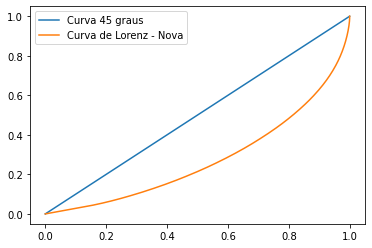

In [ ]:
# Plotando gráfico
plt.plot([0,1],[0,1], label="Curva 45 graus")
plt.plot(pnadc["PropAcumPessoas_N"],pnadc["PropAcumRenda_N"], label = "Curva de Lorenz - Nova")
plt.xlabel="Proporção da População Acumulada"
plt.ylabel="Proporção da Renda Acumulada"
plt.legend()
plt.show()

In [ ]:
###################
# Antiga simulação
###################

In [ ]:
# Ordenando valores e rearranjando index 
pnadc.sort_values(by="RDDPC",ascending=True,inplace=True)
pnadc.reset_index(drop=True,inplace=True)

In [ ]:
# Calculando renda de acordo com os pesos
pnadc["renda_A"] = (pnadc["RDDPC"])*pnadc["PESO"]

In [ ]:
# Proporção acumulada da renda
pnadc["PropAcumRenda_A"] = pnadc["renda_A"].cumsum()/pnadc["renda_A"].sum()
PARA=pnadc["PropAcumRenda_A"]

In [ ]:
# Proporção acumulada das pessoas
pnadc["PropAcumPessoas_A"] = pnadc["PESO"].cumsum()/pnadc["PESO"].sum()
PAPA=pnadc["PropAcumPessoas_A"]

In [ ]:
# Gini antiga simulação
# np.trapz calcula área abaixo da curva
# np.trapz(y,x)
GINI_A = (0.5 - np.trapz(pnadc["PropAcumRenda_A"],pnadc["PropAcumPessoas_A"]))/0.5

In [ ]:
# Valor do GINI (Antiga simulação)
GINI_A

0.5064842885097249

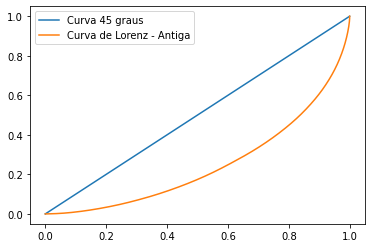

In [ ]:
# Plotando gráfico
plt.plot([0,1],[0,1], label="Curva 45 graus")
plt.plot(pnadc["PropAcumPessoas_A"],pnadc["PropAcumRenda_A"], label = "Curva de Lorenz - Antiga")
plt.xlabel="Proporção da População Acumulada"
plt.ylabel="Proporção da Renda Acumulada"
plt.legend()
plt.show()

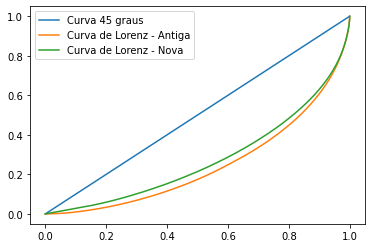

In [ ]:
# Comparando ambas curva de Lorenz - Gráfico
pnadc.reset_index(drop=True,inplace=True)
plt.plot([0,1],[0,1], label="Curva 45 graus")
plt.plot(PAPA,PARA, label = "Curva de Lorenz - Antiga")
plt.plot(PAPN,PARN, label = "Curva de Lorenz - Nova")
plt.xlabel="Proporção da População Acumulada"
plt.ylabel="Proporção da Renda Acumulada"
plt.legend()
plt.show()

In [ ]:
# Variação do GINI
(GINI_N - GINI_A)

-0.05831134739680499